<a href="https://colab.research.google.com/github/ganji759/Flood-Prediction-Using-Machine-Learning/blob/main/Workshop Session 1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IndabaX DRC 2025 Workshop Session 1**
---

Dans cet atelier, vous apprendrez les bases de l'apprentissage automatique. 
1. Importer et analyser votre ensemble de données
2. Entraîner votre premier modèle de Machine Learning (ML)
3. Valider et tester votre modèle Machine Learning (ML)
4. Enregistrer et telecharger votre modèle  

La plupart des flux de travail d'apprentissage automatique impliquent de travailler avec des données, de créer des modèles, d'optimiser les paramètres du modèle et de sauvegarder les modèles entraînés. Ce tutoriel vous présente un flux de travail ML (apprentissage automatique) complet implémenté dans PyTorch, avec des liens pour en savoir plus sur chacun de ces concepts.

Nous utiliserons l'ensemble de données FashionMNIST pour entraîner un réseau de neurones qui prédit si une image d'entrée appartient à l'une des classes suivantes : T-shirt/haut, Pantalon, Pull-over, Robe, Manteau, Sandale, Chemise, Basket, Sac ou Bottine.

Les réseaux de neurones sont un sous-ensemble de l'apprentissage automatique et constituent le cœur des algorithmes d'apprentissage profond. Ils sont composés de couches de nœuds, contenant une couche d'entrée, une ou plusieurs couches cachées et une couche de sortie. Chaque nœud se connecte à un autre et a un poids et un seuil associés. Si la sortie d'un nœud individuel dépasse la valeur de seuil spécifiée, ce nœud est activé, envoyant les données à la couche suivante du réseau. Sinon, aucune donnée n'est transmise à la couche suivante du réseau.

Le processus se resume de la maniere suivante: le neurone d'une couche calcule la somme pondérée de ses entrées, puis applique une fonction d'activation. Si le résultat de cette fonction dépasse une certaine valeur, le neurone est « activé » et transmet l'information (son signal de sortie) à la couche suivante.

L'image ci-dessous illustre parfaitement comment un réseau de neurones profond (un type de réseau neuronal convolutif ou CNN, souvent utilisé pour l'analyse d'images) effectue l'identification faciale.

Le réseau procède par extraction hiérarchique de caractéristiques à travers ses couches cachées :

    - Premières couches cachées (à gauche): Elles apprennent à reconnaître des caractéristiques très simples et de bas niveau, comme les contours, les lignes et les orientations (comme on le voit dans les premières matrices).

    - Couches cachées intermédiaires: Elles combinent ces caractéristiques simples pour former des motifs de complexité moyenne, comme les yeux, le nez ou les bouches (illustré par les matrices de visages partiels).

    - Dernières couches cachées: Elles assemblent ces motifs pour former une représentation complète et abstraite du visage (montré par les matrices de visages entiers).

Finalement, la couche de sortie utilise cette représentation hautement transformée pour classifier l'image et identifier correctement la personne comme étant "Sara". C'est ce processus sophistiqué d'extraction et de combinaison de caractéristiques qui se trouve au cœur des systèmes d'identification faciale modernes.

![alt text](artificial_neural_network.png)

[Source : ANN NVIDIA Developer](https://developer.nvidia.com/discover/artificial-neural-network)

Chargement d'un ensemble de données
=====================================

Voici un exemple de chargement de l'ensemble de données
[Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
depuis TorchVision. Fashion-MNIST est un ensemble de données d'images
d'articles de Zalando composé de 60 000 exemples d'entraînement et de 10 000 exemples de test.
Chaque exemple comprend une image en niveaux de gris de 28×28 et un
label associé de l'une des 10 classes.

Nous chargeons l'[ensemble de données FashionMNIST](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) avec les paramètres suivants :

:   -   `root` est le chemin où les données d'entraînement/test sont stockées,
    -   `train` spécifie l'ensemble de données d'entraînement ou de test,
    -   `download=True` télécharge les données d'Internet si elles ne
        sont pas disponibles à `root`.
    -   `transform` et `target_transform` spécifient les transformations
        de caractéristiques et de labels

In [29]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Itération et visualisation de l'ensemble de données
====================================================

Nous pouvons indexer les `Datasets` manuellement comme une liste : `training_data[index]`. Nous
utilisons `matplotlib` pour visualiser certains exemples de nos données d'entraînement.

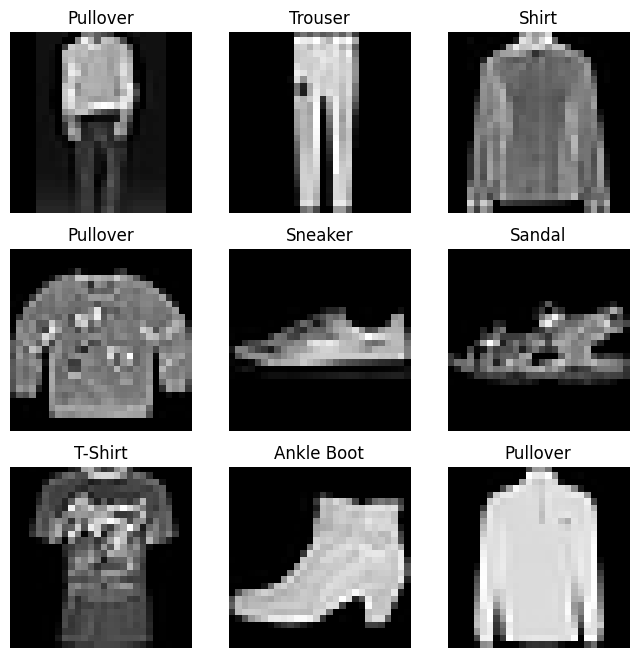

In [30]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Création d'un ensemble de données personnalisé pour vos fichiers
==============================================================

Une classe Dataset personnalisée doit implémenter trois fonctions :
[\_\_init\_\_]{.title-ref}, [\_\_len\_\_]{.title-ref} et
[\_\_getitem\_\_]{.title-ref}. Examinez cette implémentation ; les images
FashionMNIST sont stockées dans un répertoire `img_dir`, et leurs
labels sont stockés séparément dans un fichier CSV `annotations_file`.

Dans les sections suivantes, nous allons détailler ce qui se passe dans chacune de
ces fonctions.

In [31]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### `__init__`
==========

La fonction \_\_[init](#init__) est exécutée une fois lors de l'instanciation de
l'objet Dataset. Nous initialisons le répertoire contenant les images, le
fichier d'annotations et les deux transformations (couverts plus en détail dans
la section suivante).

Le fichier labels.csv ressemble à : :

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9

In [32]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### `__len__`
=========

La fonction \_\_[len](#len__) retourne le nombre d'exemples dans notre
ensemble de données.

Exemple :

In [33]:
def __len__(self):
    return len(self.img_labels)

### `__getitem__`
=============

La fonction \_\_[getitem](#getitem__) charge et retourne un exemple de
l'ensemble de données à l'index donné `idx`. En fonction de l'index, elle identifie
l'emplacement de l'image sur le disque, la convertit en tenseur en utilisant
`decode_image`, récupère le label correspondant des données csv dans
`self.img_labels`, applique les fonctions de transformation sur elles (si
applicable) et retourne le tenseur image et le label correspondant dans un
tuple.

In [34]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

Préparation de vos données pour l'entraînement avec DataLoaders
=============================================================

Le `Dataset` récupère les caractéristiques et les labels de notre ensemble de
données un exemple à la fois. Lors de l'entraînement d'un modèle, nous voulons
généralement transmettre les exemples par « minibatches », mélanger les données
à chaque époque pour réduire le surapprentissage du modèle et utiliser la
`multiprocessing` de Python pour accélérer la récupération des données.

`DataLoader` est un itérable qui abstrait cette complexité pour nous dans une
API facile.

In [35]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


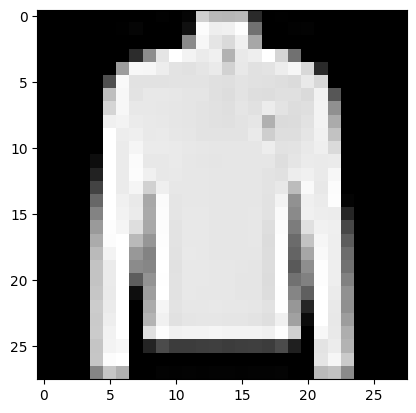

Label: 2


In [36]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}") 

Itération à travers le DataLoader
==================================

Nous avons chargé cet ensemble de données dans le `DataLoader` et pouvons
itérer à travers l'ensemble de données selon les besoins. Chaque itération ci-dessous retourne
un batch de `train_features` et `train_labels` (contenant respectivement
`batch_size=64` caractéristiques et labels). Comme nous avons spécifié
`shuffle=True`, après avoir itéré sur tous les batches, les données sont
mélangées (pour un contrôle plus fin de l'ordre de chargement des données,
consultez [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


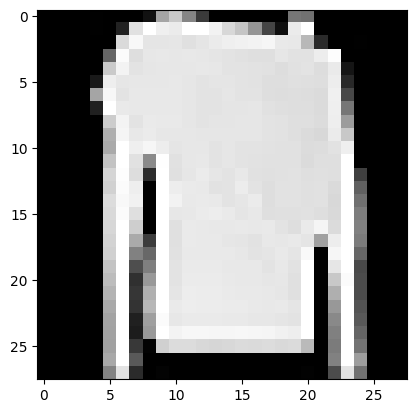

Label: 2


In [37]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 1. Réseau de neurones convolutif

Les réseaux de neurones convolutifs se distinguent des autres réseaux de neurones par leur performance supérieure avec les entrées d'image, de parole ou d'audio. Ils ont trois types de couches principaux, qui sont :

- Couche de convolution
- Couche de pooling
- Couche fully-connected (FC)

La couche de convolution est la première couche d'un réseau de convolution. Bien que les couches de convolution puissent être suivies par d'autres couches de convolution ou des couches de pooling, la couche fully-connected est la couche finale. Avec chaque couche, le CNN augmente en complexité, identifiant des portions plus grandes de l'image. Les couches antérieures se concentrent sur des caractéristiques simples, telles que les couleurs et les bords. À mesure que les données d'image progressent à travers les couches du CNN, elle commence à reconnaître des éléments plus grands ou des formes de l'objet jusqu'à ce qu'elle identifie enfin l'objet prévu.

## Couche de convolution

La couche de convolution est le bloc de construction principal d'un CNN et c'est là que la majorité du calcul se produit. Elle nécessite quelques composants, qui sont les données d'entrée, un filtre et une carte de caractéristiques. Supposons que l'entrée soit une image en couleur, composée d'une matrice de pixels en 3D. Cela signifie que l'entrée aura trois dimensions - une hauteur, une largeur et une profondeur - qui correspondent aux RVB d'une image. Nous avons également un détecteur de caractéristiques, également connu sous le nom de noyau ou filtre, qui se déplacera sur les champs récepteurs de l'image, en vérifiant si la caractéristique est présente. Ce processus est connu sous le nom de convolution.

![alt text](1680532048475.jpeg) 

[Source: CNN Deep Learning](https://developer.nvidia.com/discover/artificial-neural-network)

Le détecteur de caractéristiques est un tableau bidimensionnel (2-D) de poids, qui représente une partie de l'image. Bien qu'ils puissent varier en taille, la taille du filtre est généralement une matrice 3x3 ; cela détermine également la taille du champ récepteur. Le filtre est ensuite appliqué à une zone de l'image, et un produit scalaire est calculé entre les pixels d'entrée et le filtre. Ce produit scalaire est ensuite introduit dans un tableau de sortie. Ensuite, le filtre se déplace par une longueur de pas, répétant le processus jusqu'à ce que le noyau ait balayé l'image entière. La sortie finale de la série de produits scalaires de l'entrée et du filtre est appelée une carte de caractéristiques, une carte d'activation ou une caractéristique convoluée.

Notez que les poids dans le détecteur de caractéristiques restent fixes au fur et à mesure qu'il se déplace sur l'image, ce qu'on appelle également le partage des paramètres. Certains paramètres tels que les valeurs de poids s'ajustent pendant l'entraînement via le processus de rétropropagation et de descente de gradient. Cependant, il y a trois hyperparamètres qui affectent la taille du volume de la sortie qui doivent être définis avant l'entraînement du réseau de neurones commence. Ceux-ci incluent :

1. Le nombre de filtres affecte la profondeur de la sortie. Par exemple, trois filtres distincts produiraient trois cartes de caractéristiques différentes, créant une profondeur de trois.

2. La longueur de pas est la distance, ou le nombre de pixels, que le noyau déplace sur la matrice d'entrée. Bien que les valeurs de longueur de pas de deux ou plus soient rares, une longueur de pas plus grande produit une sortie plus petite.

3. Le remplissage zéro est généralement utilisé lorsque les filtres ne correspondent pas à l'image d'entrée. Cela définit tous les éléments qui se trouvent en dehors de la matrice d'entrée à zéro, produisant une sortie plus grande ou de taille égale. Il existe trois types de remplissage :

Remplissage valide : C'est aussi connu sous le nom de pas de remplissage. Dans ce cas, la dernière convolution est supprimée si les dimensions ne s'alignent pas.
Remplissage identique : Ce remplissage garantit que la couche de sortie a la même taille que la couche d'entrée.
Remplissage complet : Ce type de remplissage augmente la taille de la sortie en ajoutant des zéros à la bordure de l'entrée.
Après chaque opération de convolution, un CNN applique une transformation d'unité linéaire redressée (ReLU) à la carte de caractéristiques, introduisant de la non-linéarité dans le modèle.

In [38]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


Définir la classe
=================

Nous définissons notre réseau de neurones en créant une sous-classe de `nn.Module`
et en initialisant les couches du réseau de neurones dans `__init__`. Chaque
sous-classe `nn.Module` implémente les opérations sur les données d'entrée dans
la méthode `forward`.

In [39]:
from torch import nn 

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Nous créons une instance de `NeuralNetwork` et la déplaçons vers le `device`,
puis imprimons sa structure.

In [40]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Pour utiliser le modèle, nous le transmettons les données d'entrée. Cela exécute
la méthode `forward` du modèle, ainsi que certaines [opérations en arrière-plan](https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866).
N'appelez pas `model.forward()` directement !

Appeler le modèle sur l'entrée retourne un tenseur bidimensionnel avec dim=0
correspondant à chacune des 10 valeurs prédites brutes pour chaque classe,
et dim=1 correspondant aux valeurs individuelles de chaque sortie. Nous obtenons
les probabilités de prédiction en le passant à travers une instance du
module `nn.Softmax`.

In [41]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7], device='cuda:0')


Couches du modèle
=================

Analysons les couches du modèle FashionMNIST. Pour l'illustrer, nous allons prendre
un minibatch d'exemple de 3 images de taille 28x28 et voir
ce qui se passe lorsque nous le faisons passer à travers le réseau.

In [42]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


nn.Flatten
==========

Nous initialisons la couche
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
pour convertir chaque image 2D 28x28 en un tableau contigu de 784
valeurs de pixels (la dimension du minibatch (à dim=0) est maintenue).

In [43]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


nn.Linear
=========

La [couche linéaire](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
est un module qui applique une transformation linéaire sur l'entrée en utilisant ses
poids et biais stockés.

In [44]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


nn.ReLU
=======

Les activations non-linéaires sont ce qui crée les mappages complexes entre les
entrées et les sorties du modèle. Elles sont appliquées après les transformations
linéaires pour introduire de la *non-linéarité*, aidant les réseaux de neurones
à apprendre une grande variété de phénomènes.

Dans ce modèle, nous utilisons
[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
entre nos couches linéaires, mais il y a d'autres activations pour
introduire de la non-linéarité dans votre modèle.

In [45]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.6337, -0.0444,  0.2392,  0.3023,  0.3550,  0.8687,  0.2496,  0.1826,
         -0.1914, -0.5709, -0.3011,  0.0249, -0.3670,  0.2224, -0.9120, -0.1679,
         -0.2815,  0.3331,  0.0663,  0.2155],
        [ 0.3150, -0.2799,  0.2860,  0.4078,  0.2032,  0.7441,  0.5249, -0.2931,
          0.2449, -0.3831, -0.2738,  0.1559,  0.1015,  0.4542, -0.6468, -0.4749,
         -0.0754,  0.7660,  0.2266,  0.3160],
        [ 0.4880, -0.3219,  0.2799,  0.6101,  0.2875,  0.8235,  0.2291,  0.3953,
          0.0220, -0.2485, -0.2385, -0.2032,  0.2625,  0.0295, -0.8527, -0.2515,
         -0.1115,  0.4006,  0.6048,  0.0874]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.6337, 0.0000, 0.2392, 0.3023, 0.3550, 0.8687, 0.2496, 0.1826, 0.0000,
         0.0000, 0.0000, 0.0249, 0.0000, 0.2224, 0.0000, 0.0000, 0.0000, 0.3331,
         0.0663, 0.2155],
        [0.3150, 0.0000, 0.2860, 0.4078, 0.2032, 0.7441, 0.5249, 0.0000, 0.2449,
         0.0000, 0.0000, 0.1559, 0.1015, 0.4542, 0.00

nn.Sequential
=============

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)
est un conteneur ordonné de modules. Les données sont transmises à travers tous les
modules dans le même ordre que défini. Vous pouvez utiliser les conteneurs
séquentiels pour construire rapidement un réseau comme `seq_modules`.

In [46]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

nn.Softmax
==========

La dernière couche linéaire du réseau de neurones retourne [logits]{.title-ref}
- valeurs brutes dans [-infty, infty] - qui sont transmises au
module [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
Les logits sont réduits à des valeurs [0, 1] représentant les
probabilités de prédiction du modèle pour chaque classe. Le paramètre `dim`
indique la dimension selon laquelle les valeurs doivent totaliser 1.

In [47]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

Paramètres du modèle
====================

De nombreuses couches à l'intérieur d'un réseau de neurones sont *paramétrées*,
c'est-à-dire qu'elles ont des poids et des biais associés qui sont optimisés
pendant l'entraînement. Créer une sous-classe de `nn.Module` suit automatiquement
tous les champs définis dans votre objet modèle et rend tous les paramètres
accessibles en utilisant les méthodes `parameters()` ou `named_parameters()` de votre modèle.

Dans cet exemple, nous itérons sur chaque paramètre et imprimons sa taille et
un aperçu de ses valeurs.

In [48]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0200, -0.0324,  0.0137,  ...,  0.0257,  0.0331, -0.0081],
        [ 0.0326, -0.0041, -0.0316,  ..., -0.0243, -0.0101, -0.0121]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0247, -0.0247], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0168,  0.0400, -0.0125,  ..., -0.0141, -0.0151, -0.0254],
        [ 0.0427,  0.0173,  0.0114,  ...,  0.0159,  0.0164, -0.0394]],
       device='cuda:0', grad_fn=<Sl

Optimisation des paramètres du modèle
====================================

Maintenant que nous avons un modèle et des données, il est temps d'entraîner,
valider et tester notre modèle en optimisant ses paramètres sur nos données.
L'entraînement d'un modèle est un processus itératif ; à chaque itération, le
modèle fait une prédiction sur la sortie, calcule l'erreur de sa prédiction
(*loss*), collecte les dérivées de l'erreur par rapport à ses paramètres
(comme nous l'avons vu dans la [section précédente](autograd_tutorial.html)),
et **optimise** ces paramètres en utilisant la descente de gradient. Pour un
aperçu plus détaillé de ce processus, consultez cette vidéo sur la
[rétropropagation de 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).

In [49]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

Boucle d'optimisation
====================

Une fois nos hyperparamètres définis, nous pouvons entraîner et optimiser notre
modèle avec une boucle d'optimisation. Chaque itération de la boucle d'optimisation
est appelée une **époque**.

Chaque époque se compose de deux parties principales :

:   -   **La boucle d'entraînement** - itérer sur l'ensemble de données d'entraînement
        et essayer de converger vers les paramètres optimaux.
    -   **La boucle de validation/test** - itérer sur l'ensemble de données de test pour
        vérifier si les performances du modèle s'améliorent.

Familiarisons-nous brièvement avec certains des concepts utilisés dans la boucle
d'entraînement. Allez voir l'implémentation `full-impl-label`{.interpreted-text role="ref"}
de la boucle d'optimisation.

Fonction de perte
-----------------

Lorsqu'on nous présente des données d'entraînement, notre réseau non entraîné
ne retournera probablement pas la bonne réponse. La **fonction de perte** mesure
le degré de dissimilarité du résultat obtenu par rapport à la valeur cible, et c'est
la fonction de perte que nous voulons minimiser pendant l'entraînement. Pour calculer
la perte, nous faisons une prédiction en utilisant les entrées d'un exemple de données donné
et la comparons à la vraie valeur du label de données.

Les fonctions de perte communes incluent
[nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
(Erreur quadratique moyenne) pour les tâches de régression et
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss)
(Perte logarithmique négative) pour la classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
combine `nn.LogSoftmax` et `nn.NLLLoss`.

Nous transmettons les logits de sortie de notre modèle à `nn.CrossEntropyLoss`,
qui normalisera les logits et calculera l'erreur de prédiction.

In [50]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

Optimiseur
==========

L'optimisation est le processus d'ajustement des paramètres du modèle pour réduire
l'erreur du modèle à chaque étape d'entraînement. Les **algorithmes d'optimisation**
définissent comment ce processus est effectué (dans cet exemple, nous utilisons
la descente de gradient stochastique). Toute la logique d'optimisation est
encapsulée dans l'objet `optimizer`. Ici, nous utilisons l'optimiseur SGD ;
en outre, il existe de nombreux [optimiseurs différents](https://pytorch.org/docs/stable/optim.html)
disponibles dans PyTorch tels que ADAM et RMSProp, qui fonctionnent mieux
pour différents types de modèles et de données.

Nous initialisons l'optimiseur en enregistrant les paramètres du modèle qui
doivent être entraînés et en transmettant le paramètre d'hyperparamètre du taux d'apprentissage.

In [51]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Implémentation complète
======================

In [54]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):

        # Move data to the same device as the model
        X, y = X.to(device), y.to(device) 
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            # Move data to the same device as the model
            X, y = X.to(device), y.to(device) 
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Nous initialisons la fonction de perte et l'optimiseur et les transmettons à
`train_loop` et `test_loop`. N'hésitez pas à augmenter le nombre d'époques
pour suivre l'amélioration des performances du modèle.

In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309004  [   64/60000]
loss: 2.287592  [ 6464/60000]
loss: 2.275784  [12864/60000]
loss: 2.268760  [19264/60000]
loss: 2.251262  [25664/60000]
loss: 2.232001  [32064/60000]
loss: 2.220779  [38464/60000]
loss: 2.202706  [44864/60000]
loss: 2.222745  [51264/60000]
loss: 2.164416  [57664/60000]
Test Error: 
 Accuracy: 46.9%, Avg loss: 2.163004 

Epoch 2
-------------------------------
loss: 2.183207  [   64/60000]
loss: 2.099087  [ 6464/60000]
loss: 2.134418  [12864/60000]
loss: 2.077253  [19264/60000]
loss: 2.056144  [25664/60000]
loss: 2.054082  [32064/60000]
loss: 2.028297  [38464/60000]
loss: 1.993845  [44864/60000]
loss: 1.909532  [51264/60000]
loss: 1.914105  [57664/60000]
Test Error: 
 Accuracy: 55.6%, Avg loss: 1.902975 

Epoch 3
-------------------------------
loss: 1.943420  [   64/60000]
loss: 1.810500  [ 6464/60000]
loss: 1.782086  [12864/60000]
loss: 1.764031  [19264/60000]
loss: 1.653415  [25664/60000]
loss: 1.752085  [32064/600

# Évaluation et Validation du Modèle
==================================

Avant de sauvegarder notre modèle, il est important de l'évaluer complètement sur l'ensemble de test 
et de valider ses performances. Nous allons également visualiser les prédictions du modèle pour mieux 
comprendre son comportement.

In [66]:
# Comprehensive model evaluation metrics
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def evaluate_model(dataloader, model, device):
    
    model.eval()
    all_predictions = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    
    metrics = {
        'accuracy': accuracy,
        'predictions': np.array(all_predictions),
        'labels': np.array(all_labels),
        'correct': correct,
        'total': total
    }
    
    return metrics

# Evaluate on test dataset
test_metrics = evaluate_model(test_dataloader, model, device)

print(f"\n{'='*50}")
print(f"Test Set Accuracy: {test_metrics['accuracy']:.2f}%")
print(f"Correct Predictions: {test_metrics['correct']}/{test_metrics['total']}")
print(f"{'='*50}\n")


Test Set Accuracy: 70.63%
Correct Predictions: 7063/10000



## Matrice de Confusion

La matrice de confusion montre comment le modèle classifie chaque classe. 
Elle aide à identifier quels types d'erreurs le modèle fait le plus souvent.

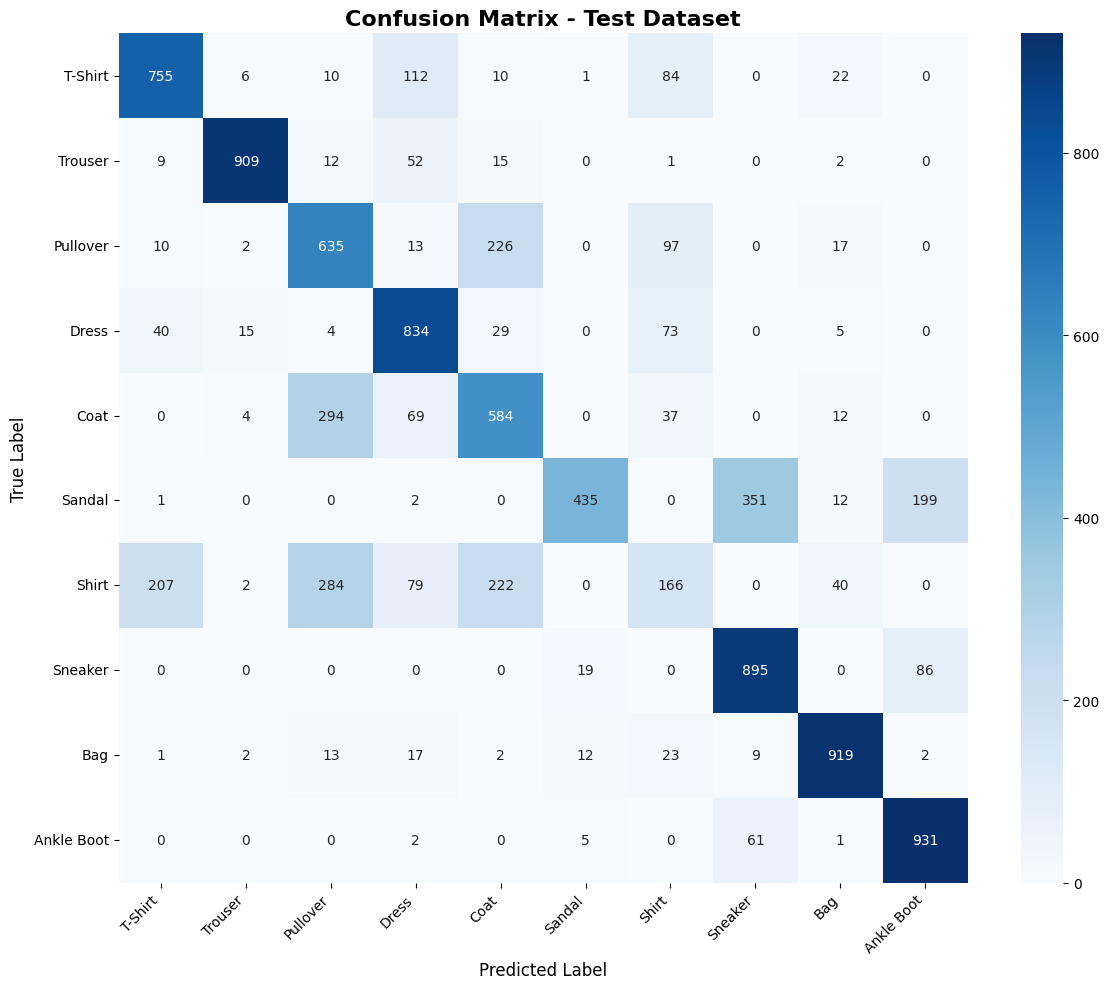

In [67]:
# Generate and visualize confusion matrix
cm = confusion_matrix(test_metrics['labels'], test_metrics['predictions'])

# Create a figure with confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=list(labels_map.values()),
            yticklabels=list(labels_map.values()))
plt.title('Confusion Matrix - Test Dataset', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Rapport de Classification

Le rapport de classification fournit des métriques détaillées (précision, rappel, F1-score) pour chaque classe.

In [68]:
# Print detailed classification report
print("\nDetailed Classification Report:")
print("="*70)
report = classification_report(test_metrics['labels'], test_metrics['predictions'],
                               target_names=list(labels_map.values()),
                               digits=4)
print(report)


Detailed Classification Report:
              precision    recall  f1-score   support

     T-Shirt     0.7380    0.7550    0.7464      1000
     Trouser     0.9670    0.9090    0.9371      1000
    Pullover     0.5072    0.6350    0.5639      1000
       Dress     0.7068    0.8340    0.7651      1000
        Coat     0.5368    0.5840    0.5594      1000
      Sandal     0.9216    0.4350    0.5910      1000
       Shirt     0.3451    0.1660    0.2242      1000
     Sneaker     0.6801    0.8950    0.7729      1000
         Bag     0.8922    0.9190    0.9054      1000
  Ankle Boot     0.7644    0.9310    0.8395      1000

    accuracy                         0.7063     10000
   macro avg     0.7059    0.7063    0.6905     10000
weighted avg     0.7059    0.7063    0.6905     10000



**( Extra codes ) Visualisation des Prédictions**
============================

Visualisons les prédictions du modèle sur un échantillon d'images de test. 
Les images correctement classifiées sont encadrées en vert, et les incorrectes en rouge.

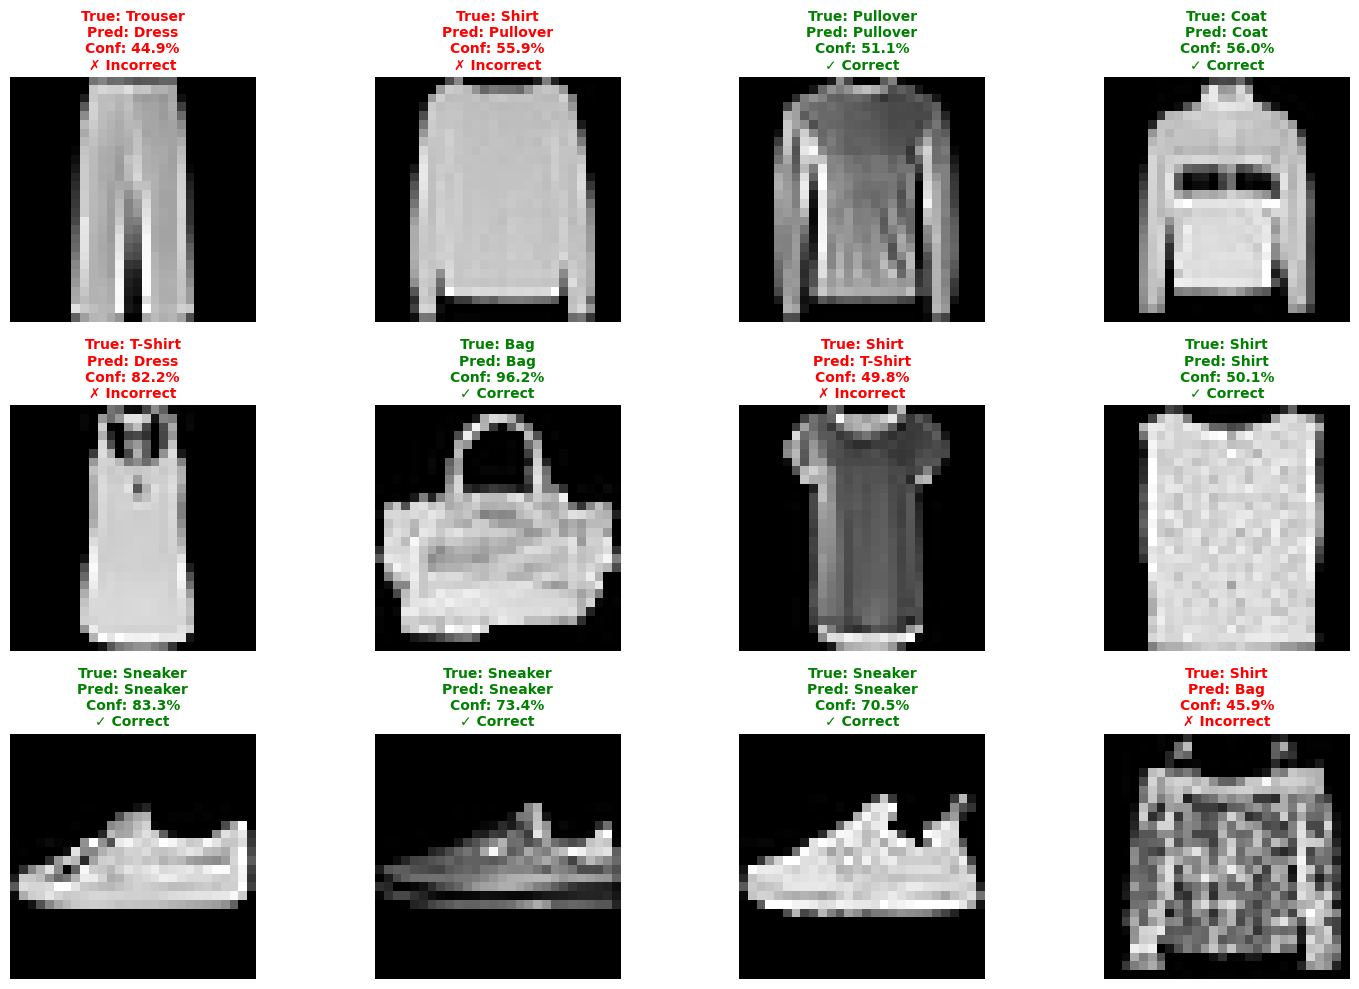

In [69]:
# Visualize predictions on random samples from test set
def visualize_predictions(model, dataloader, device, labels_map, num_samples=12):
    """
    Visualize model predictions on test samples.
    
    Args:
        model: The trained neural network model
        dataloader: DataLoader for test set
        device: Device to run the model on
        labels_map: Dictionary mapping class indices to class names
        num_samples: Number of samples to visualize
    """
    model.eval()
    
    # Get a batch of test data
    images, labels = next(iter(dataloader))
    images, labels = images.to(device), labels.to(device)
    
    # Get predictions
    with torch.no_grad():
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    
    # Plot predictions
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx in range(min(num_samples, len(images))):
        img = images[idx].cpu().squeeze()
        true_label = labels[idx].item()
        pred_label = predictions[idx].item()
        confidence = probabilities[idx][pred_label].item() * 100
        
        # Display image
        axes[idx].imshow(img, cmap='gray')
        
        # Color based on correct/incorrect prediction
        if true_label == pred_label:
            color = 'green'
            status = '✓ Correct'
        else:
            color = 'red'
            status = '✗ Incorrect'
        
        # Create title with prediction info
        title = f"True: {labels_map[true_label]}\nPred: {labels_map[pred_label]}\nConf: {confidence:.1f}%\n{status}"
        axes[idx].set_title(title, color=color, fontweight='bold', fontsize=10)
        axes[idx].axis('off')
        
        # Add border color
        for spine in axes[idx].spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)
    
    plt.tight_layout()
    plt.show()

# Visualize predictions
visualize_predictions(model, test_dataloader, device, labels_map, num_samples=12)

## Analyse des Erreurs de Prédiction

Identifions et visualisons les cas où le modèle fait des erreurs de prédiction pour comprendre ses faiblesses.

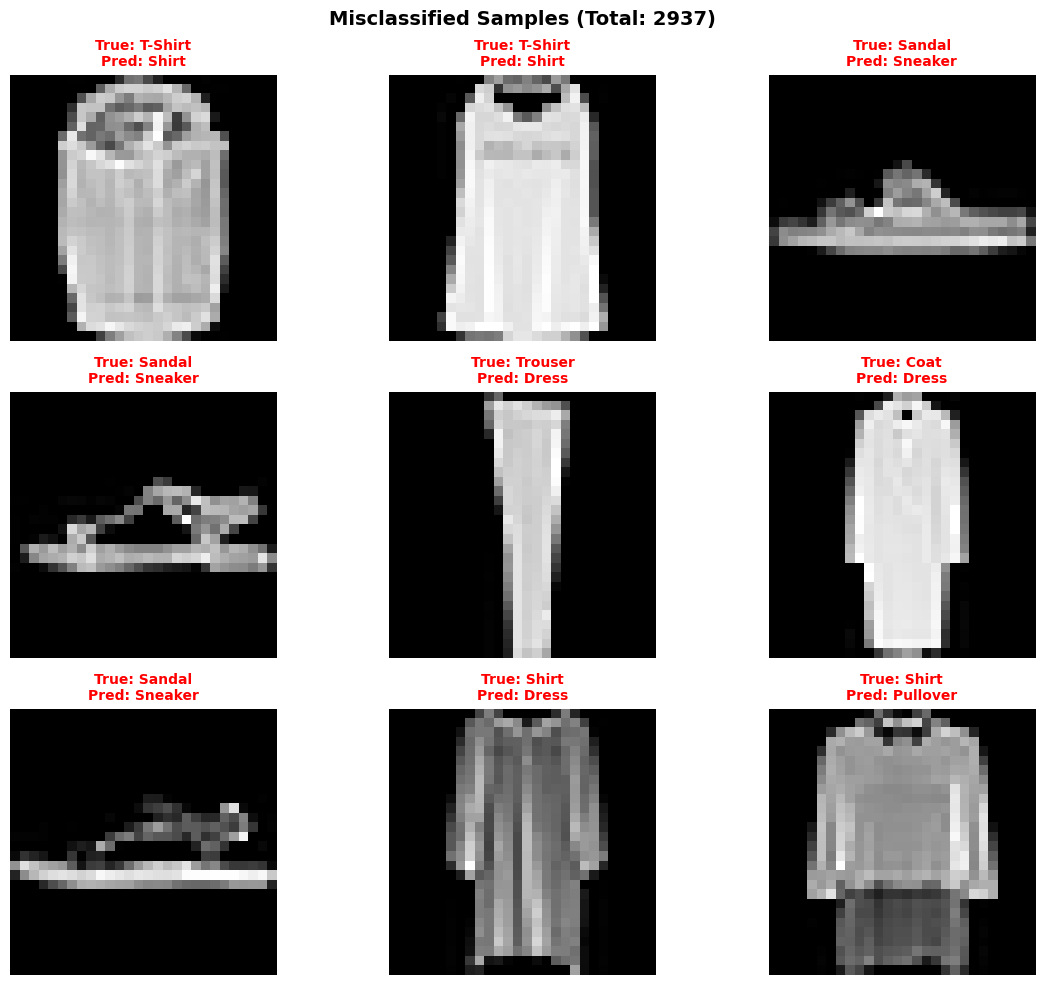


Total misclassifications found: 2937
Misclassification rate: 29.37%


In [70]:
# Analyze misclassified samples
def analyze_misclassifications(model, dataloader, device, labels_map, num_errors=9):
    """
    Find and visualize misclassified samples.
    
    Args:
        model: The trained neural network model
        dataloader: DataLoader for test set
        device: Device to run the model on
        labels_map: Dictionary mapping class indices to class names
        num_errors: Number of misclassified samples to display
    """
    model.eval()
    misclassified_images = []
    misclassified_labels = []
    misclassified_predictions = []
    
    # Collect misclassified samples
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            
            # Find misclassified samples
            misclassified_mask = (predictions != labels)
            
            if misclassified_mask.sum() > 0:
                misclassified_images.append(images[misclassified_mask].cpu())
                misclassified_labels.append(labels[misclassified_mask].cpu())
                misclassified_predictions.append(predictions[misclassified_mask].cpu())
    
    if not misclassified_images:
        print("No misclassifications found!")
        return
    
    # Concatenate all misclassified samples
    all_misclassified_images = torch.cat(misclassified_images)
    all_misclassified_labels = torch.cat(misclassified_labels)
    all_misclassified_predictions = torch.cat(misclassified_predictions)
    
    # Plot misclassified samples
    num_to_show = min(num_errors, len(all_misclassified_images))
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    axes = axes.ravel()
    
    for idx in range(num_to_show):
        img = all_misclassified_images[idx].squeeze()
        true_label = all_misclassified_labels[idx].item()
        pred_label = all_misclassified_predictions[idx].item()
        
        # Display image
        axes[idx].imshow(img, cmap='gray')
        
        # Create title with error info
        title = f"True: {labels_map[true_label]}\nPred: {labels_map[pred_label]}"
        axes[idx].set_title(title, color='red', fontweight='bold', fontsize=10)
        axes[idx].axis('off')
        
        # Add red border
        for spine in axes[idx].spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(3)
    
    # Hide unused subplots
    for idx in range(num_to_show, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f'Misclassified Samples (Total: {len(all_misclassified_images)})', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal misclassifications found: {len(all_misclassified_images)}")
    print(f"Misclassification rate: {100 * len(all_misclassified_images) / len(test_dataloader.dataset):.2f}%")

# Analyze misclassifications
analyze_misclassifications(model, test_dataloader, device, labels_map)

Enregistrer le modèle
====================
Il existe deux approches courantes pour enregistrer un modèle PyTorch :

1. **Enregistrer uniquement les poids du modèle** - Recommandé pour la plupart des cas
2. **Enregistrer le modèle entier** - Inclut l'architecture et les poids

## Approche 1 : Enregistrer les poids du modèle

La meilleure pratique consiste à enregistrer uniquement les poids du modèle.
Cela permet de modifier l'architecture du modèle si nécessaire.

In [61]:
# Enregistrer les poids du modèle
torch.save(model.state_dict(), "model_weights.pth")
print("Model Weight saved in 'model_weights.pth'")

Model Weight saved in 'model_weights.pth'


### Charger les poids du modèle

Pour charger les poids enregistrés, vous devez d'abord créer une nouvelle instance du modèle
avec la même architecture, puis charger les poids :

In [62]:
# Create an new instance of the model
model = NeuralNetwork().to(device)

# Load Weights
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))

# Evaluate the model
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

## Approche 2 : Enregistrer le modèle entier

Cette approche enregistre à la fois l'architecture et les poids. 
C'est plus pratique mais moins flexible :

### Charger le modèle complet

Charger le modèle entier est plus simple - vous n'avez pas besoin de recréer l'architecture :

In [65]:
# Save and Load the entire model
torch.save(model, "model_complete.pth")
loaded_model_complete = torch.load("model_complete.pth", weights_only=False)

# Evaluate the model
loaded_model_complete.eval()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

-------

Autres architectures de modèles CNN 
====================================

Certaines de ces autres architectures incluent :

- [AlexNet (PDF)](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

- [VGGNet (PDF)](https://arxiv.org/pdf/1409.1556)

- [GoogLeNet (PDF)](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf)

- [ResNet (PDF)](https://arxiv.org/pdf/1512.03385v1)

## Références

- [Stanford CS230](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

- [PyTorch tutorials](https://docs.pytorch.org/tutorials/beginner/basics/intro.html)

--------